This file serves to calculate a conservation score for the alignment of PWWP domains from any protein and PWWP domains from DNMT3A homologues (defined as proteins containing the same domain structure as DNMT3A)

inputs: 
PWWP_aln.fa
PWWP_seq_ids.txt
ADD_seq_ids.txt
MT_jh_seq_ids.txt


In [2]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from evcouplings.align import Alignment
import pickle
import Bio
from Bio.SubsMat import MatrixInfo
from scipy.stats import percentileofscore

In [3]:
#function to load alignments
def load_alignment(filename, filetype='fasta'):
    
    with open(filename) as f:
        aln = Alignment.from_file(f, filetype)
    
    print('Number of sequences:', aln.N)
    print('Length of alignment:', aln.L)
    
    return aln

In [4]:
#load alignment of PWWP Domains
alignment_filename = 'PWWP_aln.fa'
PWWP_aln = load_alignment(alignment_filename)
    

Number of sequences: 34848
Length of alignment: 630


In [5]:
#import sequence ids from the alignment of each domain
PWWP_ids=[]

filename= 'PWWP_seq_ids.txt'

with open(filename) as f:
    for line in f:
        id=line.strip('\n')
        PWWP_ids.append(id)
        
        
ADD_ids=[]

filename= 'ADD_seq_ids.txt'

with open(filename) as f:
    for line in f:
        id=line.strip('\n')
        ADD_ids.append(id)
    
    
MT_ids=[]

filename= 'MT_jh_seq_ids.txt'

with open(filename) as f:
    for line in f:
        id=line.strip('\n')
        MT_ids.append(id)

In [6]:
#intersect lists of sequence ids to generate a list of sequences containing all domains (PWWP, ADD, and MTase)
all_domains_ids=[]
for id in MT_ids:
    if id in ADD_ids and id in PWWP_ids :
        all_domains_ids.append(id)
    

In [13]:
# Create a new sequence alignment with just the sequences of interest (sequences that have all three domains)
ids_to_select = all_domains_ids
aln_ids = [x.split('/')[0] for x in PWWP_aln.ids]
selection_index = [aln_ids.index(id) for id in ids_to_select]
all_domains_aln = PWWP_aln.select(sequences=selection_index)
print(f"the new alignment has {all_domains_aln.N} sequences")

the new alignment has 2912 sequences


In [14]:
#this fuction numbers the positions in the alignment that corespond to residues contained in the query sequence
def get_query_positions(alignment, query='Auto'):
    
    if query=='Auto':
        query = alignment.ids[0]
    
    alignment.matrix[np.where(alignment.matrix=='_')]='-'
    alignment.matrix[np.where(alignment.matrix=='.')]='-'
    
    query_notgapped = alignment[query]!='-'
    
    return query_notgapped

In [15]:
#running the above fuction with human DNMT3A as the query on the alignment of PWWP domains
for id in all_domains_aln.ids:
    if 'UniRef100_Q9Y6K1' in id:
        DNMT3A=id
        
dnmt3a_positions= get_query_positions(PWWP_aln, DNMT3A)

In [16]:
#indexing the PWWP alignment to the numbering of the full length DNMT3A sequence
index = PWWP_aln.id_to_index[DNMT3A]
sequence = PWWP_aln.matrix[index,:]
print("the sequence is", sequence)
#G291 is the first residue

the sequence is ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' 'G' 'I'
 'G' 'E' 'L' '-' 'V' 'W' '-' '-' '-' '-' '-' '-' '-' '-' 'G' 'K' '-' 'L'
 'R' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' 'G' '-' '-' '-' '-' 'F' 'S' '-' '-' 'W' 'W' 'P' 'G' 'R'
 '-' '-' '-' 'I' 'V' '-' '-' '-' '-' '-' 'S' 'W' 'W' 'M' 'T' '-' '-' '-'
 '-' 'G' 'R' 'S' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-'
 '-' '-' '-' '-' '-' '-' '-' '-' '-

In [18]:
#selecting only not gapped positions
DNMT3A_res_aln_PWWP=PWWP_aln.select(columns=np.where(dnmt3a_positions)[0])
DNMT3A_res_aln_all_dom=all_domains_aln.select(columns=np.where(dnmt3a_positions)[0])

In [19]:
#check to make sure gaps in PWWP alignment are gone
index = DNMT3A_res_aln_PWWP.id_to_index[DNMT3A]
sequence = DNMT3A_res_aln_PWWP.matrix[index,:]
print("the sequence is", sequence)
sequence[46]

the sequence is ['G' 'I' 'G' 'E' 'L' 'V' 'W' 'G' 'K' 'L' 'R' 'G' 'F' 'S' 'W' 'W' 'P' 'G'
 'R' 'I' 'V' 'S' 'W' 'W' 'M' 'T' 'G' 'R' 'S' 'R' 'A' 'A' 'E' 'G' 'T' 'R'
 'W' 'V' 'M' 'W' 'F' 'G' 'D' 'G' 'K' 'F' 'S' 'V' 'V' 'C' 'V' 'E' 'K' 'L'
 'M' 'P' 'L' 'S' 'S' 'F' 'C' 'S' 'A' 'F' 'H' 'Q' 'A' 'T' 'Y' 'N' 'K' 'Q'
 'P' 'M' 'Y' 'R' 'K' 'A' 'I' 'Y' 'E' 'V' 'L' 'Q']


'S'

In [20]:
# This function uses the blosum80 matrix to calculate a conservation score for each position of DNMT3A. The gap penalty is 
#set to -6, the strongest negative value for an aa substitution in the blosum80 matrix. This can be set manually to other 
#values. The output of this function isn't normalized.

blo80=MatrixInfo.blosum80
alphabet=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
def blosum_weight(alignment, query=[0], gap_penalty=-6):
   
    aln_m=alignment.matrix
    
    index = alignment.id_to_index[query]
    
    blosum_scores_matrix= np.zeros((alignment.N, alignment.L))
    
    for i in range(alignment.L) :
        X=aln_m[index,i]
        for nj,j in enumerate(aln_m[:,i]) :
            if j in alphabet:
                query=(X, j)
                query2=(j, X)
                try: 
                    blosum_scores_matrix[(nj,i)]=blo80[query]
                except:
                    blosum_scores_matrix[(nj,i)]=blo80[query2]
            else:
                  blosum_scores_matrix[(nj,i)]=gap_penalty  
    
    blosum_scores_summed=np.sum(blosum_scores_matrix,axis=0)
    
    return  blosum_scores_matrix,  blosum_scores_summed


In [21]:
#Generates an alignment of DNMT3A to itself as many times as there are sequences in the alignment to create a "maximum possible
# conservation" score for each position that can be used for normalization. 
too_many_DNMT3As_PWWP=DNMT3A_res_aln_PWWP.select(sequences=[DNMT3A_res_aln_PWWP.id_to_index[DNMT3A]]*DNMT3A_res_aln_PWWP.N)
too_many_DNMT3As_all=DNMT3A_res_aln_all_dom.select(sequences=[DNMT3A_res_aln_all_dom.id_to_index[DNMT3A]]*DNMT3A_res_aln_all_dom.N)

#uses above function to calculate conservation scores for test and max conservation alignments

#PWWP alignment
blosum_scores_matrix_PWWP,blosum_scores_summed_PWWP=blosum_weight(DNMT3A_res_aln_PWWP, DNMT3A)
control_scores_matrix_PWWP,control_scores_summed_PWWP=blosum_weight(too_many_DNMT3As_PWWP, DNMT3A)

#All domains alignment:
blosum_scores_matrix_all,blosum_scores_summed_all=blosum_weight(DNMT3A_res_aln_all_dom, DNMT3A)
control_scores_matrix_all,control_scores_summed_all=blosum_weight(too_many_DNMT3As_all,DNMT3A)


In [22]:
#normalizes and makes positive the conservation scores:
blosum_scores_normed_PWWP=(blosum_scores_summed_PWWP+(6*DNMT3A_res_aln_PWWP.N))/(control_scores_summed_PWWP+(6*DNMT3A_res_aln_PWWP.N))
blosum_scores_normed_all=(blosum_scores_summed_all+(6*DNMT3A_res_aln_all_dom.N))/(control_scores_summed_all+(6*DNMT3A_res_aln_all_dom.N))

In [24]:
residue_numbers=np.arange(291,375,1)

0.3346642250328053
0.7558990962272227


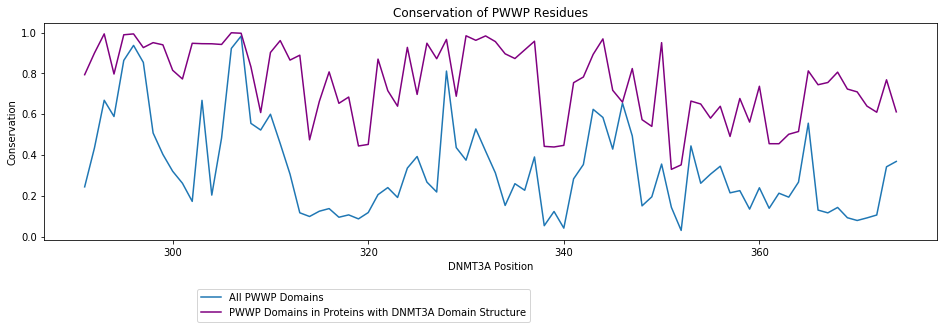

In [26]:
#plots normalized substitution scores 
plt.figure(figsize=(16,4))
plt.plot(residue_numbers, blosum_scores_normed_PWWP, label='All PWWP Domains')
plt.plot(residue_numbers, blosum_scores_normed_all, color='purple', label='PWWP Domains in Proteins with DNMT3A Domain Structure')

#PWWP Domain (Uniprot domain boundaries, subtract 1 in index b/c position 1= index 0)
#plt.axvline(x=291, color='red')
#plt.axvline(x=349, color='red')

#ADD Domain
#plt.axvline(x=481, color='orange')
#plt.axvline(x=613, color='orange')

#MT Domain
#plt.axvline(x=633, color='green')
#plt.axvline(x=911, color='green')

plt.title('Conservation of PWWP Residues')
plt.xlabel('DNMT3A Position')
plt.ylabel('Conservation')
plt.legend(bbox_to_anchor=(0.55, -0.2))

print(np.mean(blosum_scores_normed_PWWP))
print(np.mean(blosum_scores_normed_all))
#all sequence numbers are +291

plt.savefig('C:/Users/emgar/Documents/Liau_Lab/2020/EG_10012_PWWP_conservation/EG10012_PWWP_lineplot', format='pdf', bbox_inches='tight')

In [27]:
#calculate difference in coservation score at each position between the PWWP alignment and the all domains alignment
blosum_scores_diff=blosum_scores_normed_all-blosum_scores_normed_PWWP
pickle.dump(blosum_scores_diff, open('C:/Users/emgar/Documents/Liau_Lab/2020/EG_10012_PWWP_conservation/PWWP_differences.pickle', 'wb'))

In [28]:
np.argsort(blosum_scores_diff)

array([55, 16,  5,  6, 15, 18,  4, 37, 60,  3, 62, 71, 83, 73, 38, 74, 52,
       64, 66, 17, 12, 54, 65, 19, 34, 72, 48, 70, 61,  2, 56, 29, 58, 28,
       23, 53, 63, 47, 49, 57, 82, 68, 51, 40,  7, 32, 67, 14,  1, 50, 31,
        9, 69, 81, 20, 10,  8, 24, 80,  0, 26, 21, 41, 46, 27, 33, 59, 39,
       44, 75, 79, 78, 76, 42, 36, 77, 30, 25, 35, 45, 13, 43, 22, 11],
      dtype=int64)

0.42123487119441727
0.1862918417920831
0.04865118761025106


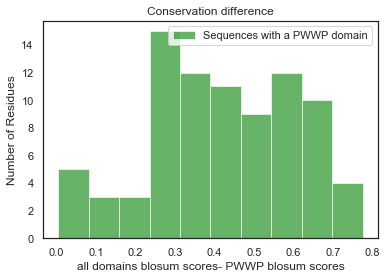

In [29]:
#histogram of differences
import seaborn as sns
plt.figure
sns.set(style="white", palette="muted", color_codes=True)
plt.hist(blosum_scores_diff, color='green',label="Sequences with a PWWP domain", alpha=0.6)

plt.title('Conservation difference')
plt.xlabel('all domains blosum scores- PWWP blosum scores')
plt.ylabel('Number of Residues')
plt.legend()

print(np.mean(blosum_scores_diff))
print(np.std(blosum_scores_diff))
print(np.mean(blosum_scores_diff)-2*np.std(blosum_scores_diff))

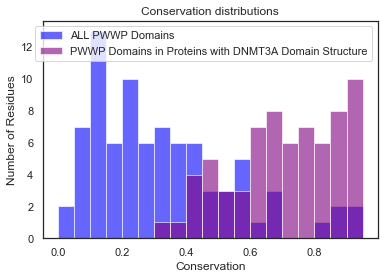

In [30]:
#overlaid histograms of conservation distribution in each alignment
plt.figure
sns.set(style="white", palette="muted", color_codes=True)
plt.hist(blosum_scores_normed_PWWP, color='blue',bins=np.arange(0,1.0,0.05),label="ALL PWWP Domains", alpha=0.6)
plt.hist(blosum_scores_normed_all, color='purple',bins=np.arange(0,1.0,0.05), label='PWWP Domains in Proteins with DNMT3A Domain Structure', alpha=0.6)

plt.title('Conservation distributions')
plt.xlabel('Conservation')
plt.ylabel('Number of Residues')
plt.legend()

#print(np.mean(normed_diffs))
#print(np.mean(normed_diffs[481:613]))

In [31]:
#calculate z scores
PWWP_z_scores=(blosum_scores_normed_PWWP-np.mean(blosum_scores_normed_PWWP))/np.std(blosum_scores_normed_PWWP)
all_z_scores=(blosum_scores_normed_all-np.mean(blosum_scores_normed_all))/np.std(blosum_scores_normed_all)
zdiffs=all_z_scores-PWWP_z_scores

In [32]:
#define residues that were screening hits
screen_hits=np.array([337, 293, 312, 342, 301, 309])

screen_hits-291+17


array([63, 19, 38, 68, 27, 35])

In [33]:
# define residues mutated from past literature
lit_residues=np.array([ 326,333, 337, 297, 310,330])
lit_residues-291+17


array([52, 59, 63, 23, 36, 56])

In [34]:
#residues targeted by more than one guide where not every guide was enriched
overlap_hit_not_enriched=np.array([309,312])
overlap_hit_not_enriched-291+17

array([35, 38])

In [35]:
#residue mutated in literature and a hit in the screen
overlap_lit_screen=np.array([337])
overlap_lit_screen-291+17

array([63])

In [36]:
#residues targeted in the screen that were not enriched
not_enriched=np.array([309, 307, 318, 323, 324, 321, 322, 325, 326, 312])
not_enriched-291+17

array([35, 33, 44, 49, 50, 47, 48, 51, 52, 38])

In [37]:
#color dots by amount of conservation difference
high_cons_diff=[]
for index, value in enumerate(blosum_scores_diff):
    if value> np.mean(blosum_scores_diff)+0.5*np.std(blosum_scores_diff):
        high_cons_diff.append(index)
        
mid_cons_diff=[]
for index, value in enumerate(blosum_scores_diff):
    if value> np.mean(blosum_scores_diff)-0.5*np.std(blosum_scores_diff) and value<np.mean(blosum_scores_diff)+0.5*np.std(blosum_scores_diff):
        mid_cons_diff.append(index)

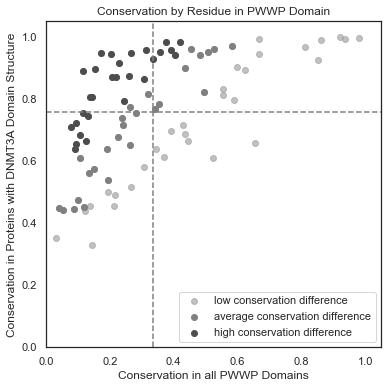

In [38]:
#plot conservation difference; greyscale corresponds to difference in conservation between all PWWP domain alignment and 3 domains alignment
plt.figure(figsize=[6,6])

#grayscale for amount of conservation difference
plt.scatter(blosum_scores_normed_PWWP, blosum_scores_normed_all, color='0.6', alpha=0.6,label= 'low conservation difference')
plt.scatter(blosum_scores_normed_PWWP[mid_cons_diff], blosum_scores_normed_all[mid_cons_diff], color='0.5', alpha=1.0,label= 'average conservation difference')
plt.scatter(blosum_scores_normed_PWWP[high_cons_diff], blosum_scores_normed_all[high_cons_diff], color='0.3', alpha=1.0,label= 'high conservation difference')

#label hits/not_enriched, lit residues
#plt.scatter(blosum_scores_normed_PWWP[screen_hits-291], blosum_scores_normed_all[screen_hits-291],alpha=1, s=50, label= 'Screen Hits')
#plt.scatter(blosum_scores_normed_PWWP[lit_residues-291], blosum_scores_normed_all[lit_residues-291], color='magenta', alpha=1.0, s=50, label= 'Literature Mutations')
#plt.scatter(blosum_scores_normed_PWWP[not_enriched-291], blosum_scores_normed_all[not_enriched-291], color='red', alpha=0.7, s=50, label= 'Not Enriched')
#plt.scatter(blosum_scores_normed_PWWP[overlap_hit_not_enriched-291], blosum_scores_normed_all[overlap_hit_not_enriched-291], color='purple', alpha=1, s=50, label= 'overlap enriched/not enriched')

#label overlap lit/screen
#plt.scatter(blosum_scores_normed_PWWP[overlap_lit_screen-291], blosum_scores_normed_all[overlap_lit_screen-291], color='orange', alpha=1, s=50, label= 'Screen Hit and Literature Mutation')

#Add lines for means of each distribution
plt.axvline(np.mean(blosum_scores_normed_PWWP), color='grey', linestyle='dashed')
plt.axhline(np.mean(blosum_scores_normed_all), color='grey', linestyle='dashed')

plt.title('Conservation by Residue in PWWP Domain')
plt.xlabel('Conservation in all PWWP Domains')
plt.ylabel('Conservation in Proteins with DNMT3A Domain Structure')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.legend()

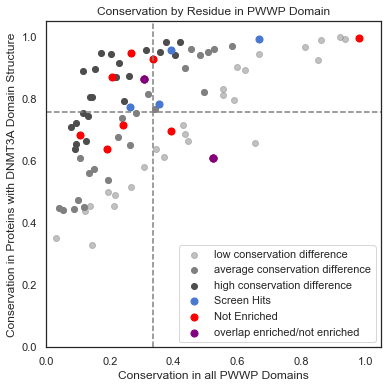

In [39]:
#same as above; overlay screen results
plt.figure(figsize=[6,6])

#grayscale for amount of conservation difference
plt.scatter(blosum_scores_normed_PWWP, blosum_scores_normed_all, color='0.6', alpha=0.6,label= 'low conservation difference')
plt.scatter(blosum_scores_normed_PWWP[mid_cons_diff], blosum_scores_normed_all[mid_cons_diff], color='0.5', alpha=1.0,label= 'average conservation difference')
plt.scatter(blosum_scores_normed_PWWP[high_cons_diff], blosum_scores_normed_all[high_cons_diff], color='0.3', alpha=1.0,label= 'high conservation difference')

#label hits/not_enriched, lit residues
plt.scatter(blosum_scores_normed_PWWP[screen_hits-291], blosum_scores_normed_all[screen_hits-291],alpha=1, s=50, label= 'Screen Hits')
#plt.scatter(blosum_scores_normed_PWWP[lit_residues-291], blosum_scores_normed_all[lit_residues-291], color='magenta', alpha=1.0, s=50, label= 'Literature Mutations')
plt.scatter(blosum_scores_normed_PWWP[not_enriched-291], blosum_scores_normed_all[not_enriched-291], color='red', alpha=1.0, s=50, label= 'Not Enriched')
plt.scatter(blosum_scores_normed_PWWP[overlap_hit_not_enriched-291], blosum_scores_normed_all[overlap_hit_not_enriched-291], color='purple', alpha=1, s=50, label= 'overlap enriched/not enriched')

#label overlap lit/screen
#plt.scatter(blosum_scores_normed_PWWP[overlap_lit_screen-291], blosum_scores_normed_all[overlap_lit_screen-291], color='orange', alpha=1, s=50, label= 'Screen Hit and Literature Mutation')

#Add lines for means of each distribution
plt.axvline(np.mean(blosum_scores_normed_PWWP), color='grey', linestyle='dashed')
plt.axhline(np.mean(blosum_scores_normed_all), color='grey', linestyle='dashed')

plt.title('Conservation by Residue in PWWP Domain')
plt.xlabel('Conservation in all PWWP Domains')
plt.ylabel('Conservation in Proteins with DNMT3A Domain Structure')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.legend()

plt.savefig('C:/Users/emgar/Documents/Liau_Lab/2020/EG_10012_PWWP_conservation/EG10012_PWWP_scatter_screen_annotations', format='pdf', bbox_inches='tight')

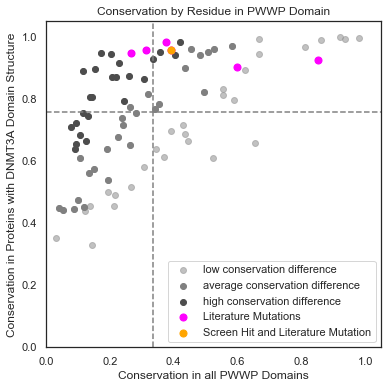

In [40]:
#same as above, highlight literature residues
plt.figure(figsize=[6,6])

#grayscale for amount of conservation difference
plt.scatter(blosum_scores_normed_PWWP, blosum_scores_normed_all, color='0.6', alpha=0.6,label= 'low conservation difference')
plt.scatter(blosum_scores_normed_PWWP[mid_cons_diff], blosum_scores_normed_all[mid_cons_diff], color='0.5', alpha=1.0,label= 'average conservation difference')
plt.scatter(blosum_scores_normed_PWWP[high_cons_diff], blosum_scores_normed_all[high_cons_diff], color='0.3', alpha=1.0,label= 'high conservation difference')

#label hits/not_enriched, lit residues
#plt.scatter(blosum_scores_normed_PWWP[screen_hits-291], blosum_scores_normed_all[screen_hits-291],alpha=1, s=50, label= 'Screen Hits')
plt.scatter(blosum_scores_normed_PWWP[lit_residues-291], blosum_scores_normed_all[lit_residues-291], color='magenta', alpha=1.0, s=50, label= 'Literature Mutations')
#plt.scatter(blosum_scores_normed_PWWP[not_enriched-291], blosum_scores_normed_all[not_enriched-291], color='red', alpha=1.0, s=50, label= 'Not Enriched')
#plt.scatter(blosum_scores_normed_PWWP[overlap_hit_not_enriched-291], blosum_scores_normed_all[overlap_hit_not_enriched-291], color='purple', alpha=1, s=50, label= 'overlap enriched/not enriched')

#label overlap lit/screen
plt.scatter(blosum_scores_normed_PWWP[overlap_lit_screen-291], blosum_scores_normed_all[overlap_lit_screen-291], color='orange', alpha=1, s=50, label= 'Screen Hit and Literature Mutation')

#Add lines for means of each distribution
plt.axvline(np.mean(blosum_scores_normed_PWWP), color='grey', linestyle='dashed')
plt.axhline(np.mean(blosum_scores_normed_all), color='grey', linestyle='dashed')

plt.title('Conservation by Residue in PWWP Domain')
plt.xlabel('Conservation in all PWWP Domains')
plt.ylabel('Conservation in Proteins with DNMT3A Domain Structure')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.legend()

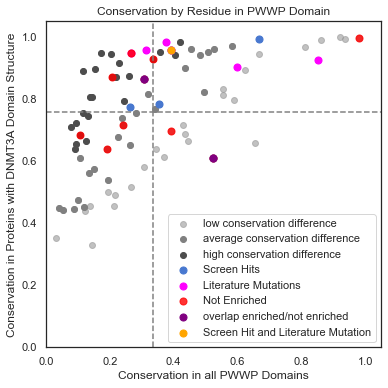

In [41]:
#same as abve, highlight literature values and screen results
plt.figure(figsize=[6,6])

#grayscale for amount of conservation difference
plt.scatter(blosum_scores_normed_PWWP, blosum_scores_normed_all, color='0.6', alpha=0.6,label= 'low conservation difference')
plt.scatter(blosum_scores_normed_PWWP[mid_cons_diff], blosum_scores_normed_all[mid_cons_diff], color='0.5', alpha=1.0,label= 'average conservation difference')
plt.scatter(blosum_scores_normed_PWWP[high_cons_diff], blosum_scores_normed_all[high_cons_diff], color='0.3', alpha=1.0,label= 'high conservation difference')

#label hits/not_enriched, lit residues
plt.scatter(blosum_scores_normed_PWWP[screen_hits-291], blosum_scores_normed_all[screen_hits-291],alpha=1, s=50, label= 'Screen Hits')
plt.scatter(blosum_scores_normed_PWWP[lit_residues-291], blosum_scores_normed_all[lit_residues-291], color='magenta', alpha=1.0, s=50, label= 'Literature Mutations')
plt.scatter(blosum_scores_normed_PWWP[not_enriched-291], blosum_scores_normed_all[not_enriched-291], color='red', alpha=0.8, s=50, label= 'Not Enriched')
plt.scatter(blosum_scores_normed_PWWP[overlap_hit_not_enriched-291], blosum_scores_normed_all[overlap_hit_not_enriched-291], color='purple', alpha=1, s=50, label= 'overlap enriched/not enriched')

#label overlap lit/screen
plt.scatter(blosum_scores_normed_PWWP[overlap_lit_screen-291], blosum_scores_normed_all[overlap_lit_screen-291], color='orange', alpha=1, s=50, label= 'Screen Hit and Literature Mutation')

#Add lines for means of each distribution
plt.axvline(np.mean(blosum_scores_normed_PWWP), color='grey', linestyle='dashed')
plt.axhline(np.mean(blosum_scores_normed_all), color='grey', linestyle='dashed')

plt.title('Conservation by Residue in PWWP Domain')
plt.xlabel('Conservation in all PWWP Domains')
plt.ylabel('Conservation in Proteins with DNMT3A Domain Structure')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.legend()

In [49]:
#same as above, save to pdf
plt.figure(figsize=[6,6])

#grayscale for amount of conservation difference
plt.scatter(blosum_scores_normed_PWWP, blosum_scores_normed_all, color='0.6', alpha=0.6,label= 'low conservation difference')
plt.scatter(blosum_scores_normed_PWWP[mid_cons_diff], blosum_scores_normed_all[mid_cons_diff], color='0.5', alpha=1.0,label= 'average conservation difference')
plt.scatter(blosum_scores_normed_PWWP[high_cons_diff], blosum_scores_normed_all[high_cons_diff], color='0.3', alpha=1.0,label= 'high conservation difference')

#label hits/not_enriched, lit residues
plt.scatter(blosum_scores_normed_PWWP[screen_hits-291], blosum_scores_normed_all[screen_hits-291],alpha=1, s=50, label= 'Screen Hits')
plt.scatter(blosum_scores_normed_PWWP[lit_residues-291], blosum_scores_normed_all[lit_residues-291], color='magenta', alpha=1.0, s=50, label= 'Literature Mutations')
#plt.scatter(blosum_scores_normed_PWWP[not_enriched-291], blosum_scores_normed_all[not_enriched-291], color='red', alpha=0.8, s=50, label= 'Not Enriched')
#plt.scatter(blosum_scores_normed_PWWP[overlap_hit_not_enriched-291], blosum_scores_normed_all[overlap_hit_not_enriched-291], color='purple', alpha=1, s=50, label= 'overlap enriched/not enriched')

#label overlap lit/screen
plt.scatter(blosum_scores_normed_PWWP[overlap_lit_screen-291], blosum_scores_normed_all[overlap_lit_screen-291], color='orange', alpha=1, s=50, label= 'Screen Hit and Literature Mutation')

#Add lines for means of each distribution
plt.axvline(np.mean(blosum_scores_normed_PWWP), color='grey', linestyle='dashed')
plt.axhline(np.mean(blosum_scores_normed_all), color='grey', linestyle='dashed')

plt.title('Conservation by Residue in PWWP Domain')
plt.xlabel('Conservation in all PWWP Domains')
plt.ylabel('Conservation in Proteins with DNMT3A Domain Structure')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.legend()

 # Save to pdf
plt.savefig('PWWP_cons.pdf', format='pdf')
plt.close()

In [43]:
#calculate the frequency of each amino acid at a particular position in the alignment
frequency_309 = DNMT3A_res_aln_all_dom.frequencies[(309-291),:]
print(f"There are {frequency_309.size} amino acids in the alignment")

for idx, amino_acid in enumerate(DNMT3A_res_aln_all_dom.alphabet):
    print(f"{amino_acid}, {np.round(frequency_309[idx], 5)}")

There are 21 amino acids in the alignment
-, 0.00137
A, 0.0
C, 0.00034
D, 0.0
E, 0.00034
F, 0.0
G, 0.0
H, 0.00137
I, 0.1408
K, 0.00378
L, 0.09993
M, 0.27679
N, 0.0
P, 0.0
Q, 0.00275
R, 0.44196
S, 0.0
T, 0.00446
V, 0.02335
W, 0.0
Y, 0.00275


In [44]:
#make a data frame with the conservation scores
rows=[]
for i, score in enumerate(blosum_scores_normed_PWWP):
    row=(i, i+291, score, blosum_scores_normed_all[i])
    rows.append(row)
    
labels=('alignment_res','DNMT3A_res','PWWP_Conservation_Score','All_Domains_Conservation_Score')

conservation_by_residue=pd.DataFrame.from_records(rows, columns=labels)

In [46]:
#save data frame as csv
conservation_by_residue.to_csv('C:/Users/emgar/Documents/Liau_Lab/2020/EG_10012_PWWP_conservation/conservation_by_residue.csv')

Text(0, 0.5, 'Number of Residues')

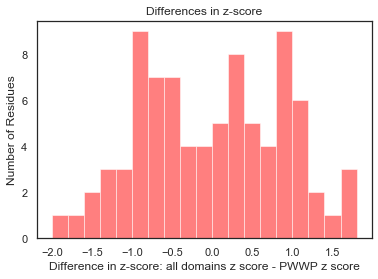

In [634]:
#plot differences in z score
plt.figure
sns.set(style="white", palette="muted", color_codes=True)
plt.hist(zdiffs, color='red',label="all domains z score - PWWP z score", bins=np.arange(-2,2,0.2), alpha=0.5)
plt.title('Differences in z-score')
plt.xlabel('Difference in z-score: all domains z score - PWWP z score')
plt.ylabel('Number of Residues')
#plt.legend()